In [1]:
# history
# n个样本 分成c类 一共能分成多少类，  划分空间？

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

im = imageio.imread('imageio:chelsea.png')



LUT和LUT2得到的答案是否完全相同，答案：True
LUT和LUT3得到的答案是否完全相同，答案：True
验证，都和原图像不同（经过处理），答案：False
两表内容是否完全一致True


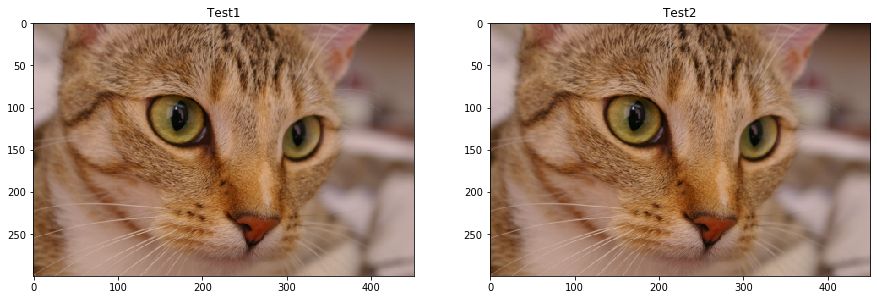

In [29]:

# 建表以后LUT
def GammaTable(gamma): 
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return table
def LUT(image , lutTable):
    # image: grayscale or RGB color image
    # luTable: [255,] 1D numpy array mapping 0-255 values to ohter values
    lut = lambda x: lutTable[x]
    return lut(image)


def ForLUT2(x, lutTable):
    return lutTable[x]

def LUT2(image ,lutTable):
    return ForLUT2(image,lutTable)

def LUT3(image,lutTable):
    return lutTable[image]



testlut = im[:,:,1]
testlutgamma  = 2
resultlut1 = LUT(testlut,GammaTable(testlutgamma))
resultlut2 = LUT2(testlut,GammaTable(testlutgamma))
resultlut3 = LUT3(testlut,GammaTable(testlutgamma))


print("LUT和LUT2得到的答案是否完全相同，答案：",end = "")
print((resultlut1==resultlut2).all())
print("LUT和LUT3得到的答案是否完全相同，答案：",end = "")
print((resultlut1==resultlut3).all())

print("验证，都和原图像不同（经过处理），答案：",end = "")
print((resultlut3==im[:,:,1]).all())




def GammaTableChange(gamma):
    invGamma = 1.0 / gamma
    table = np.zeros(256)
    for i in np.arange(0, 256):
        table[i] = (((i/255.0)**invGamma)*255).astype("uint8")
    return table

def TestEq(table1,table2):
    print("两表内容是否完全一致"+str((table1 == table2).all()))



# 直接伽马函数映射
def DirectGammaFunc(image,gamma):
    invGamma = 1.0/gamma
    fuc =  lambda x: ((x/255.0)**invGamma)*255
    return fuc(image).astype("uint8")

# 直接伽马函数计算
def DirectCaculate(image,gamma):
    newimg = np.copy(image)
    


def ImThresh(im, minv, maxv):
    BinImg = np.zeros(im.shape, dtype=im.dtype)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i,j]>=minv and im[i,j]<=maxv:
                BinImg[i,j]=1
            else:
                BinImg[i,j]=0
    return BinImg

def ImThreshv2(image, minv, maxv):
    assert(len(image.shape)==2)
    # 二值逻辑
    group1 = image >= minv
    group2 = image <= maxv
    # 与操作 即要求满足 像素值>=minv 又要 <=maxv
    return (group1*group2).astype(np.uint8)

# 杰哥的写法
def ImThreshv3(image, minv, maxv):
    assert(len(image.shape)==2)
    # 只是这里用的非逻辑值，数字化为0，1（uint8类型）
    newimg = np.copy(image)
    newimg[newimg > maxv] = 0
    newimg[newimg < minv] = 0
    newimg[newimg != 0] = 1
    return newimg.astype(np.uint8)



R = im[:,:,0]
gamma  = 1.5
TestEq(LUT(R,GammaTable(gamma)),LUT(R,GammaTableChange(gamma)))

R_crrt = LUT(R,GammaTable(gamma))
R_crrt2 = LUT2(R,GammaTable(gamma))
R_crrt_test = DirectGammaFunc(R,gamma)

inverGrey = lambda x: (255-x)

plt.figure(figsize=(15,20))
ax = plt.subplot(121)
ax.set_title("Test1")
plt.imshow(im)

R_crrt_inv = inverGrey(R_crrt)

ax = plt.subplot(122)
ax.set_title("Test2")
plt.imshow(im)



plt.show()


[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 0 0 ... 1 1 1]]


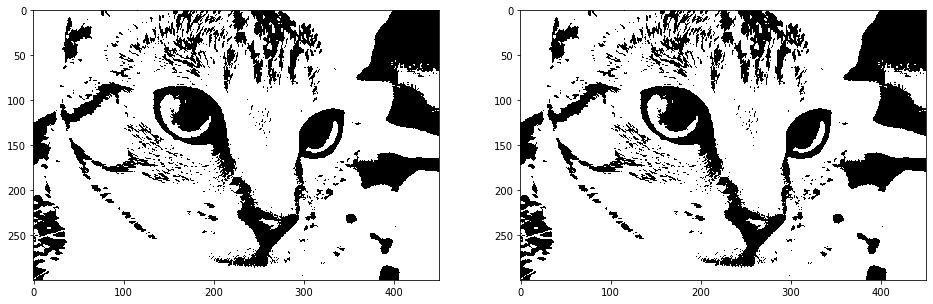

In [28]:
plt.figure(figsize=(16,10))
ax1 = plt.subplot(121)
ax1.imshow(ImThresh(R,130,256),cmap = "gray")
ax2 = plt.subplot(122)
ax2.imshow(ImThreshv3(R,130,256),cmap = "gray")
plt.show()

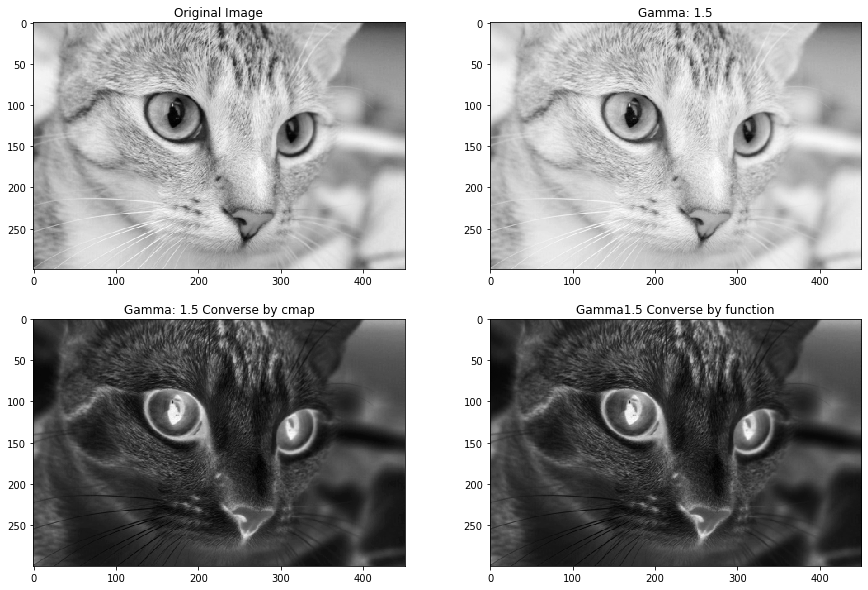

In [4]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(2,2,1)
ax.set_title('Original Image')
plt.imshow(R,cmap = "gray")

ax = plt.subplot(2,2,2)
ax.set_title('Gamma: '+str(gamma))
plt.imshow(R_crrt, cmap="gray")

ax = plt.subplot(2,2,3)
ax.set_title('Gamma: '+str(gamma)+" Converse by cmap")
plt.imshow(R_crrt, cmap="gray_r")


ax = plt.subplot(224)
ax.set_title('Gamma' + str(gamma)+ " Converse by function")
plt.imshow(R_crrt_inv, cmap="gray")

plt.show()




In [1]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(1,2,1)
X = np.array(range(0,256))
plt.plot(X, GammaTable(1))
ax.set_title('gamma=1.0')
ax = plt.subplot(1,2,2)
plt.plot(X, GammaTable(gamma))
ax.set_title('gamma='+str(gamma))
plt.show()


NameError: name 'plt' is not defined